<a href="https://colab.research.google.com/github/rickytirta17/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


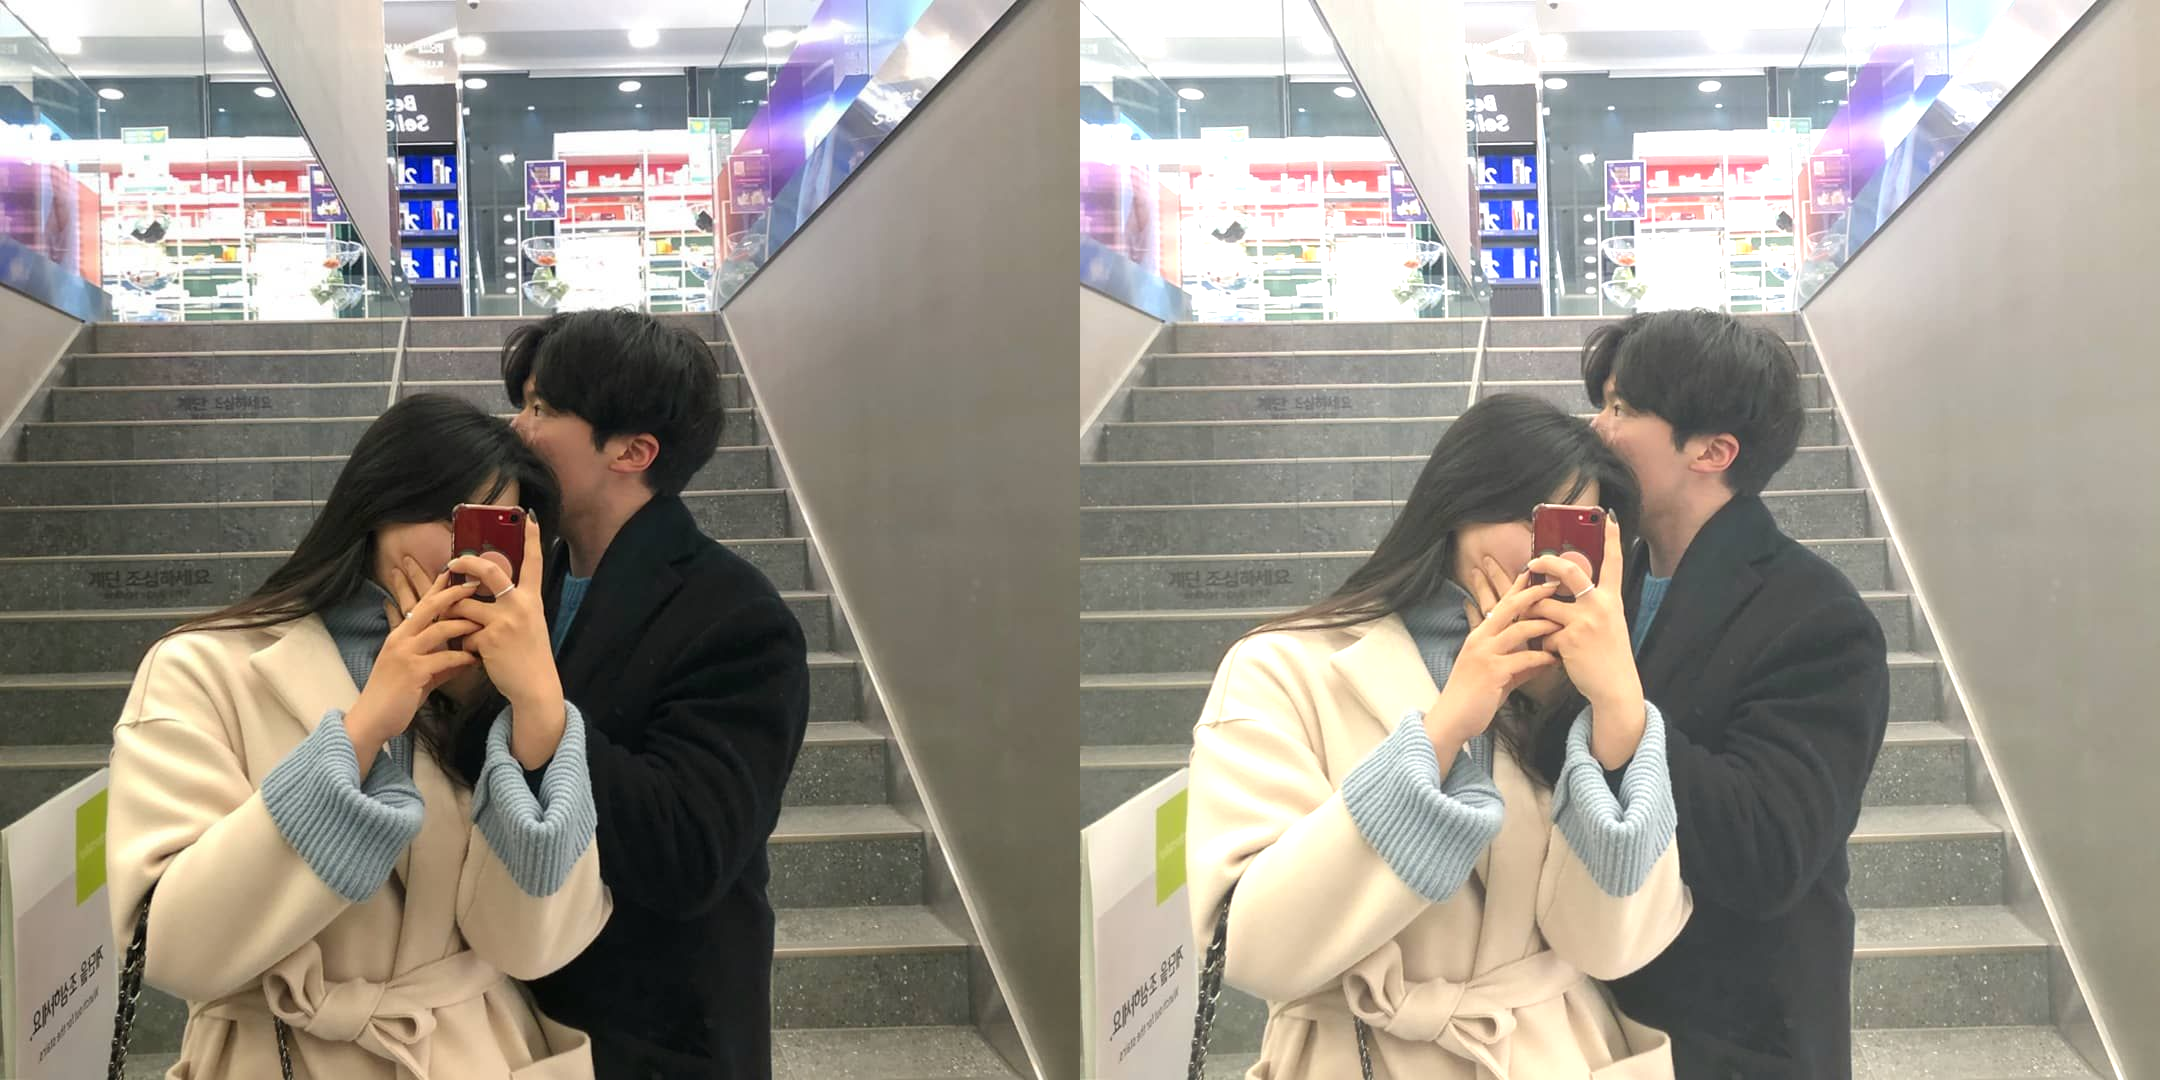

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#Cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 60
Masukkan nilai kontras: 1.5


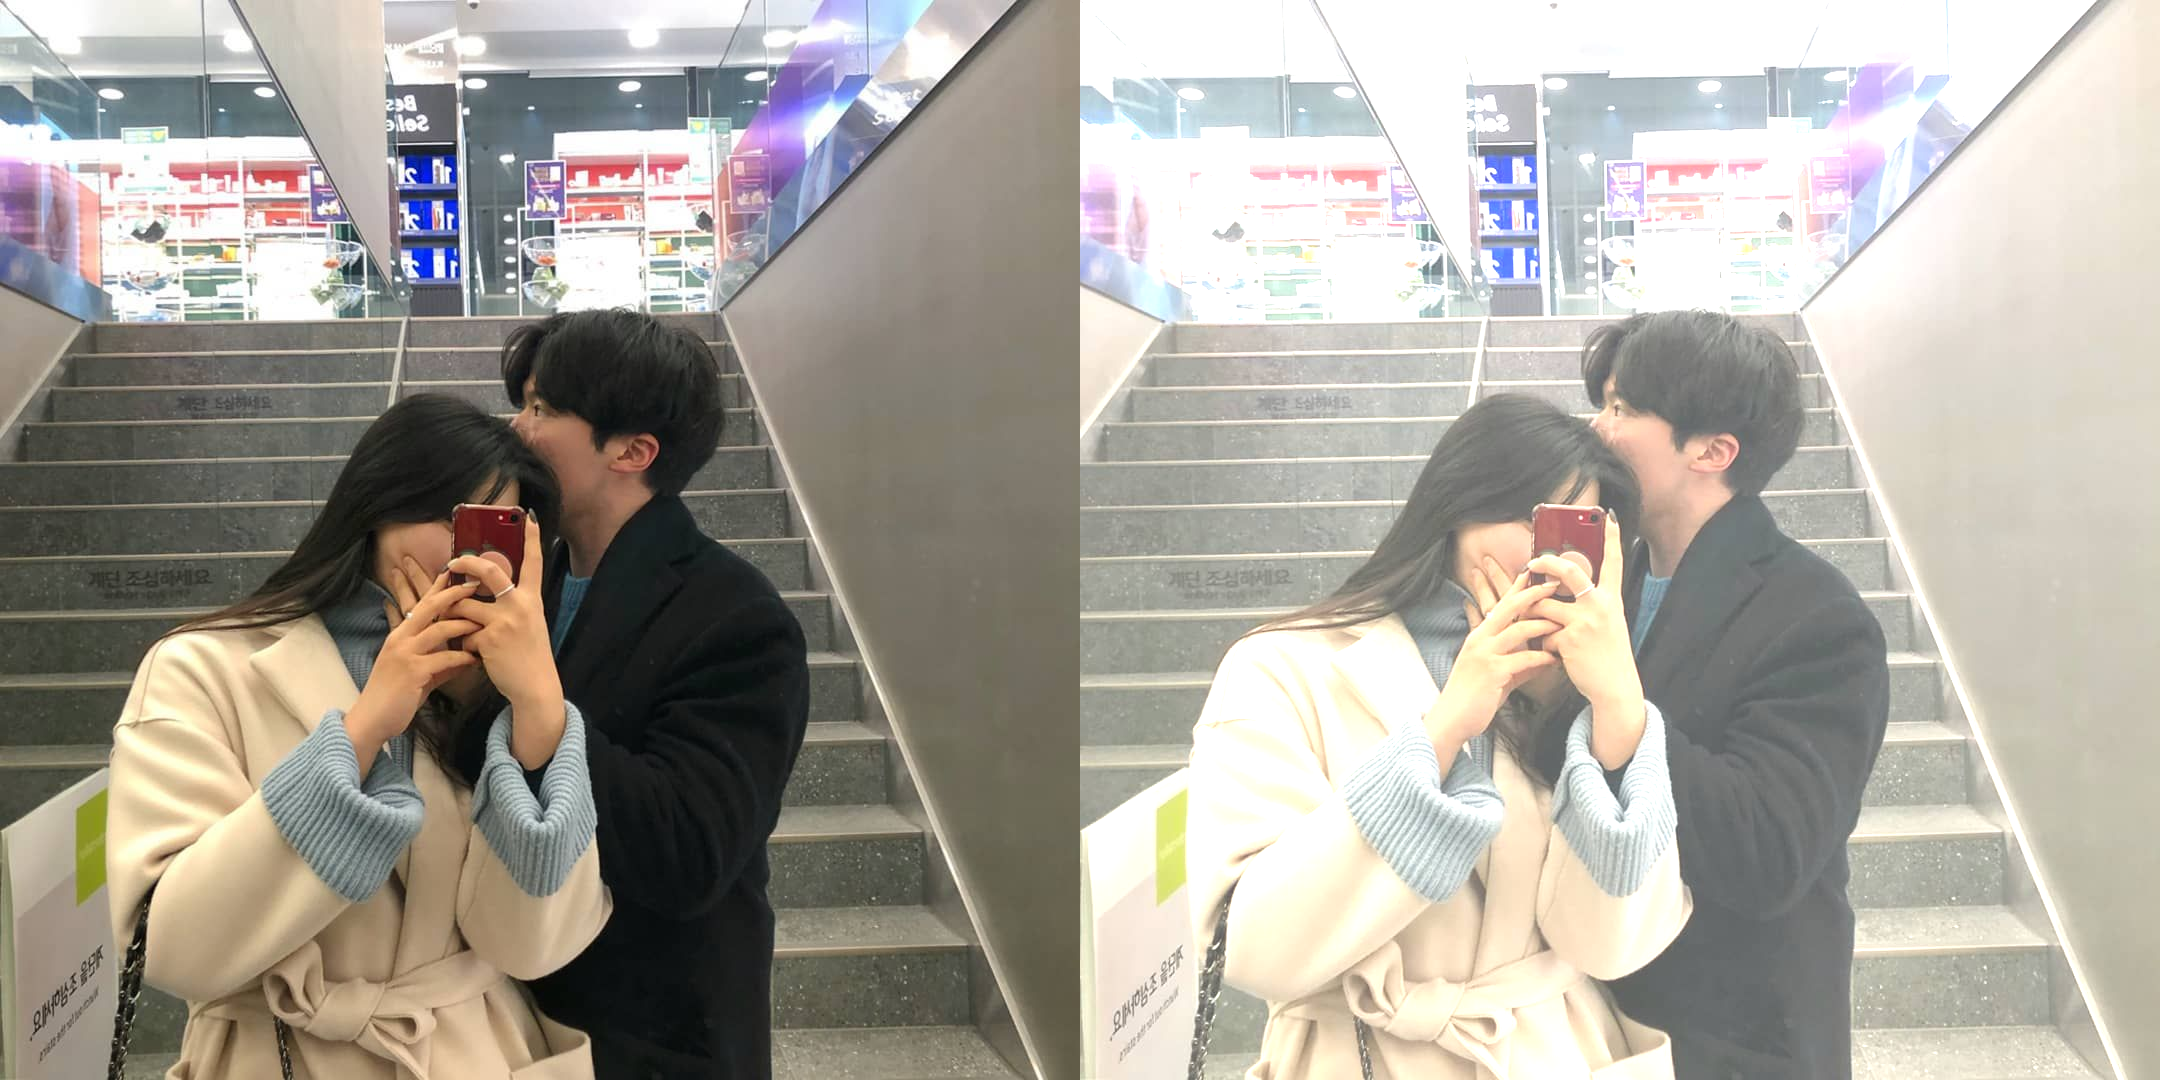

In [8]:
# Tugas 1
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = float(input('Masukkan nilai kecerahan: '))
  contrast = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness * contrast, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 40


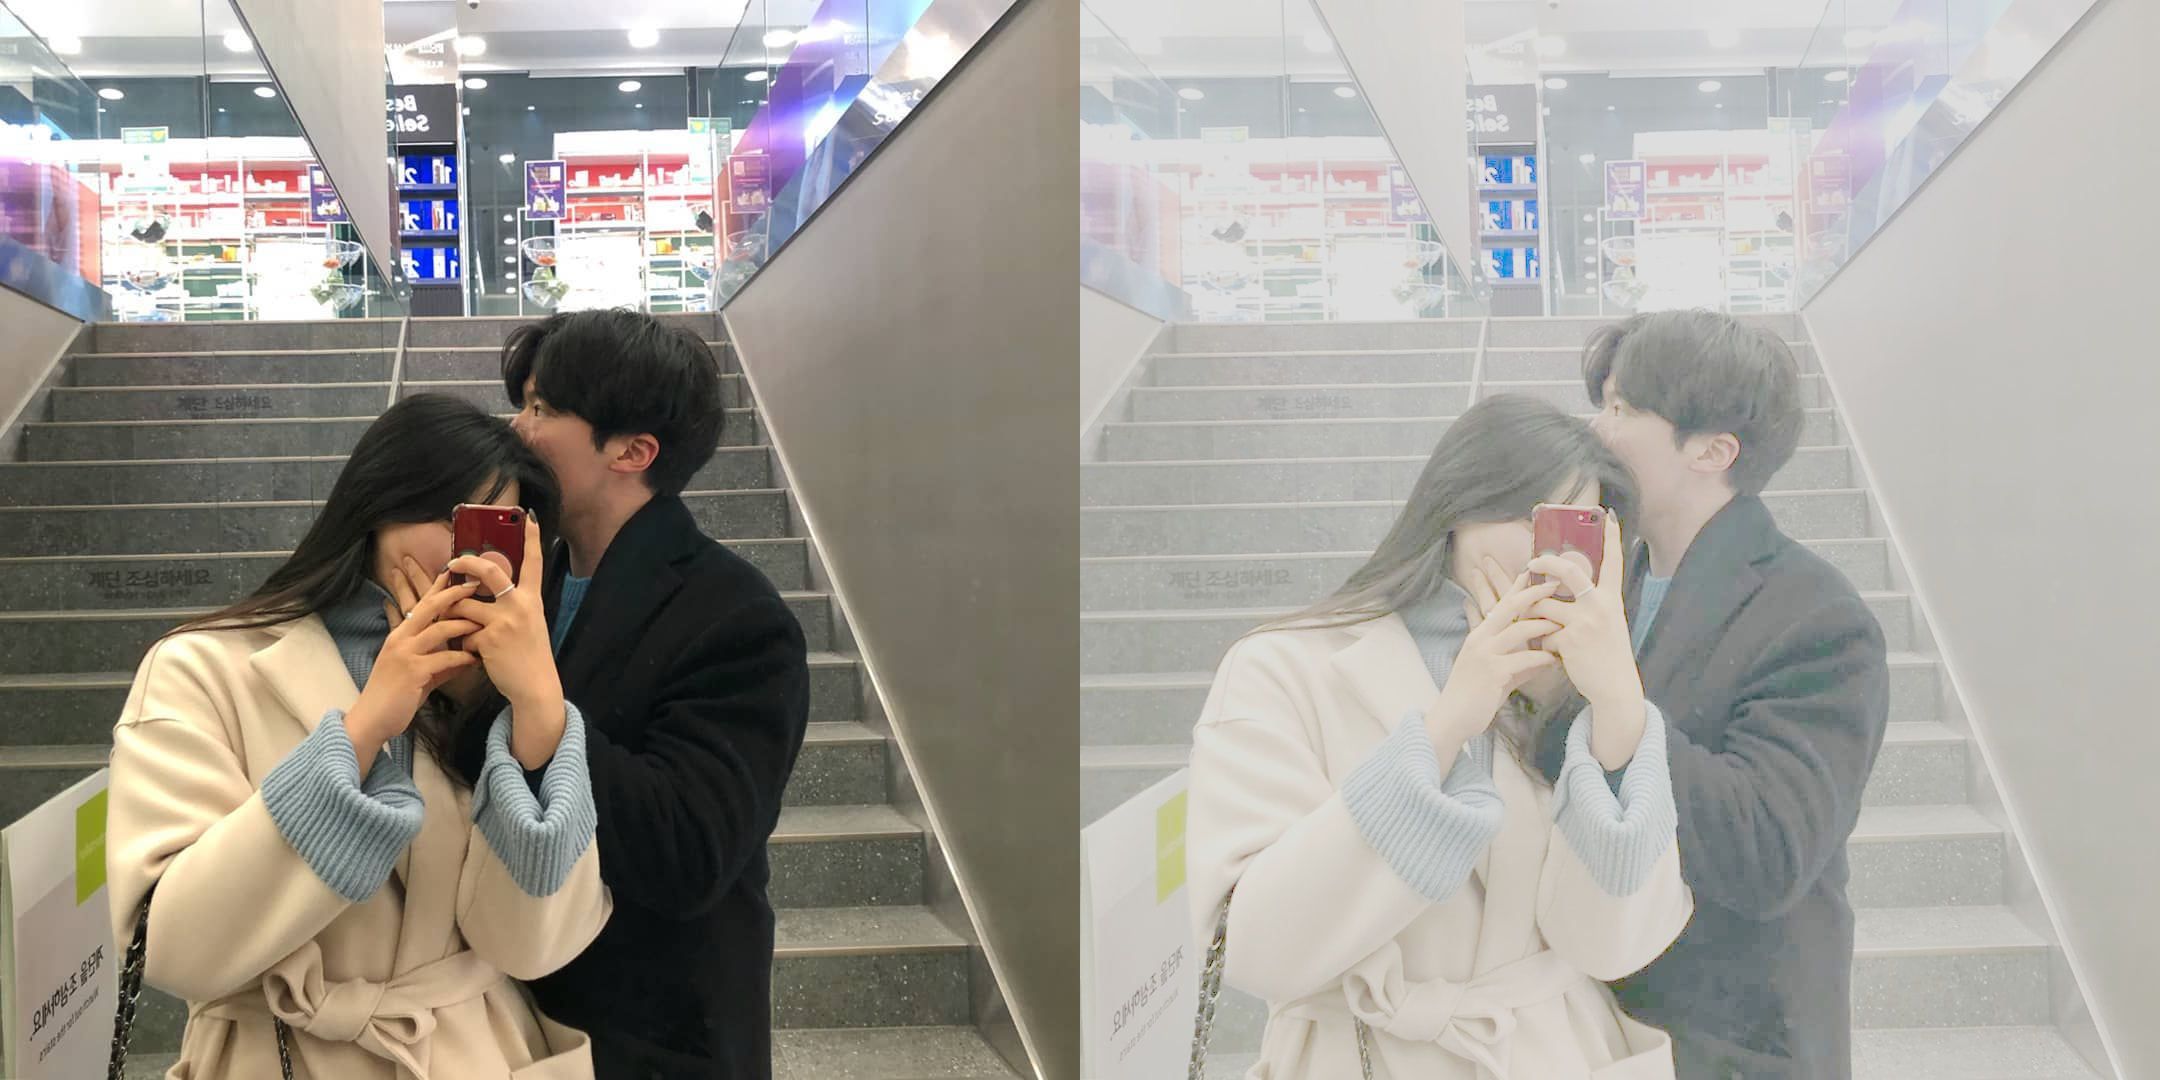

In [9]:
# Logarithmic brightness
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

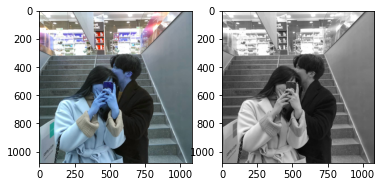

In [22]:
# Averaging
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
GrayAvg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
GrayAvg[:] = np.sum(GrayAvg, axis=-1, keepdims=1)/3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(GrayAvg)

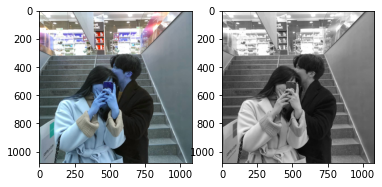

In [24]:
# Lightness
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
GrayLig = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
GrayLig[:] = (np.max(GrayLig, axis=-1, keepdims=1))/2 + (np.min(GrayLig, axis=-1, keepdims=1))/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(GrayLig, cmap='gray')

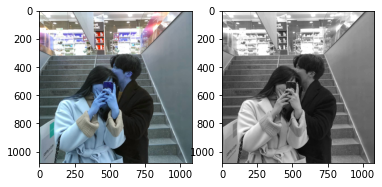

In [25]:
# Luminance
img = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
lumi = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(lumi, cmap='gray')

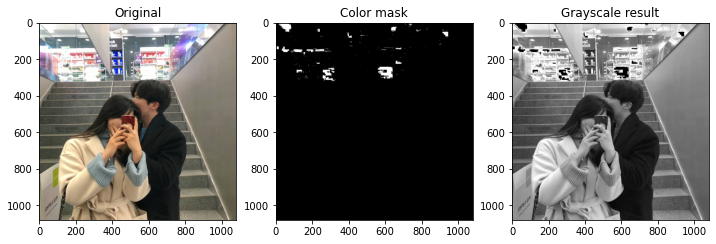

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image in color
img = cv.imread('/content/drive/MyDrive/PCVK/seong.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the color to display (BGR format)
color_to_display = np.array([255, 255, 255])

# Create a mask for the color to display
color_mask = cv2.inRange(img, color_to_display, color_to_display)

# Create an inverted mask for the grayscale portion
gray_mask = cv2.bitwise_not(color_mask)

# Apply the masks to the original image and grayscale image
color_result = cv2.bitwise_and(img, img, mask=color_mask)
gray_result = cv2.bitwise_and(gray_img, gray_img, mask=gray_mask)

# Show the original image, color mask, and grayscale result
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(color_mask, cmap='gray'), plt.title('Color mask')
plt.subplot(133), plt.imshow(gray_result, cmap='gray'), plt.title('Grayscale result')
plt.show()
